In [1]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
outdata_path = '../outdata/'

In [2]:
import parameters as params
from parameters import *
from MM_Traj_Utils import *
from MM_Maze_Utils import NewMaze
from MM_Plot_Utils import *
from plot_utils import plot_nodes_vs_time, plot_maze_stats

rewarded nan nan
unrewarded nan nan


/Users/usingla/cse258venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/usingla/cse258venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/usingla/cse258venv/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/usingla/cse258venv/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/usingla/cse258venv/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
from utils import convert_episodes_to_traj_class, convert_traj_to_episodes

In [4]:
from collections import defaultdict

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline

In [7]:
ma = NewMaze(6)

In [8]:
params.UnrewNamesSub

['B5', 'B6', 'B7', 'D3', 'D4', 'D5', 'D7', 'D8', 'D9']

### Nodes from where mice reach the center (node 0) by the direct path?

B5


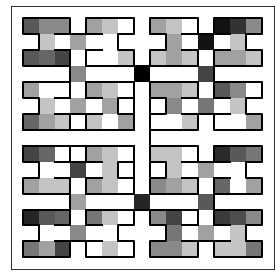

B6


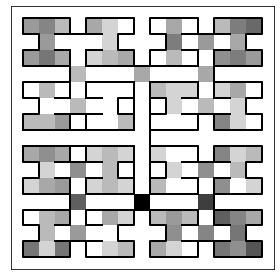

B7


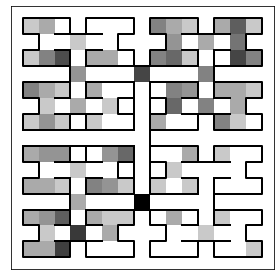

D3


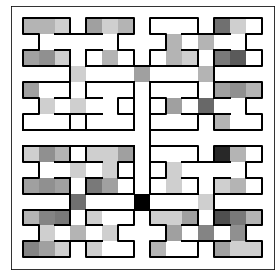

D4


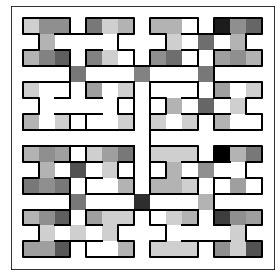

D5


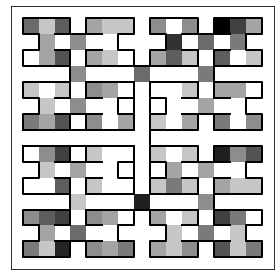

D7


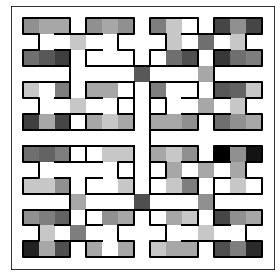

D8


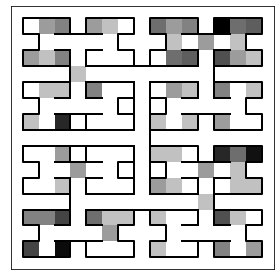

D9


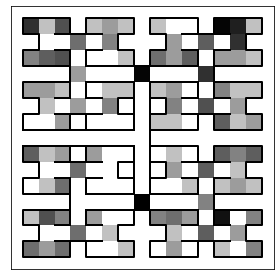

In [134]:
to_node=0
for sub in params.UnrewNamesSub:
    tf = LoadTrajFromPath(outdata_path + sub + '-tf')
    hr=FindPathsToAnyNode(to_node,tf,ma)
    fr,_=np.histogram(hr[:,1],bins=np.arange(2**(ma.le+1))-0.5)
    fr=np.log(fr+1)/np.log(np.max(fr+1))
    print(sub)
    PlotMazeFunction(fr,ma,mode='nodes',numcol=None,figsize=4,col=None);
    plt.show()

B5


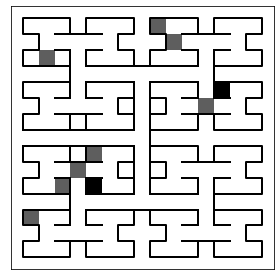

B6


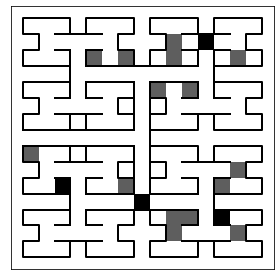

B7


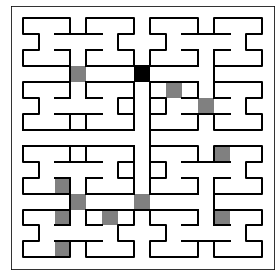

D3


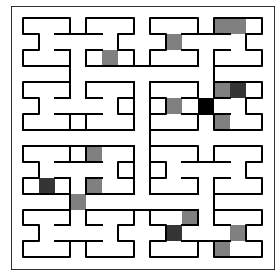

D4


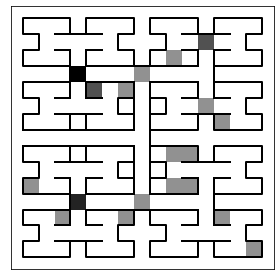

D5


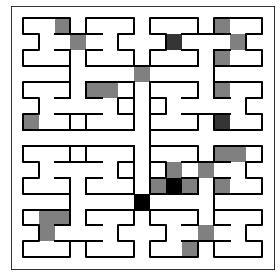

D7


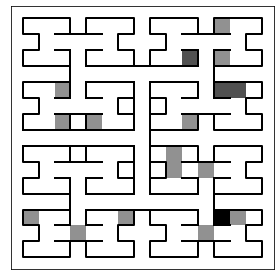

D8


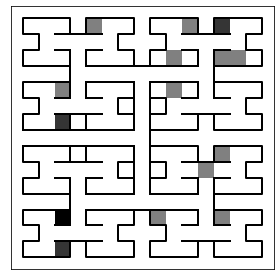

D9


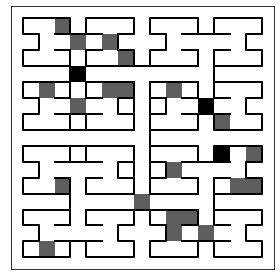

In [13]:
# Same as above, but looking at only first 10 episodes
to_node=0
for sub in params.UnrewNamesSub:
    tf = LoadTrajFromPath(outdata_path + sub + '-tf')
    epi = convert_traj_to_episodes(tf)[:10]
    tf = convert_episodes_to_traj_class(epi)
    hr=FindPathsToAnyNode(to_node,tf,ma)
    fr,_=np.histogram(hr[:,1],bins=np.arange(2**(ma.le+1))-0.5)
    fr=np.log(fr+1)/np.log(np.max(fr+1))
    print(sub)
    PlotMazeFunction(fr,ma,mode='nodes',numcol=None,figsize=4,col=None);
    plt.show()

In [10]:
# define node numbers of all nodes
lv6_nodes = list(range(63,127))
lv5_nodes = list(range(31,63))
lv4_nodes = list(range(15,31))
lv3_nodes = list(range(7,15))
lv2_nodes = list(range(3,7))
lv1_nodes = list(range(1,3))
lv0_nodes = list(range(0,1))
lvl_dict = {0:lv0_nodes, 1:lv1_nodes, 2:lv2_nodes, 3:lv3_nodes, 4:lv4_nodes, 5:lv5_nodes, 6:lv6_nodes}

In [11]:
def level3_path(n):
    path = []
    path.append(n)
    levels = 3
    while levels:
        if n%2 == 0:
            n -= 1
        n = n//2
        levels -= 1
        path.append(n)
    return tuple(path)[::-1]

In [12]:
def _count_query_paths(tf, valid_query_paths):
    first_visit_endnode_counts = dict.fromkeys(lv6_nodes, 0)
    for i, bout in enumerate(tf.no):
        path = [node for node, _ in bout]
        for j in range(len(path)):
            query_path = tuple(path[j:j+4])
            if len(query_path) < 4:
                break
            if valid_query_paths.get(query_path, None) is not None:
                first_visit_endnode_counts[query_path[-1]] += 1
    return first_visit_endnode_counts

In [13]:
def _count_total_visits(tf, node):
    count = np.sum([np.count_nonzero(t[:, 0] == node) for t in tf.no])
    return count

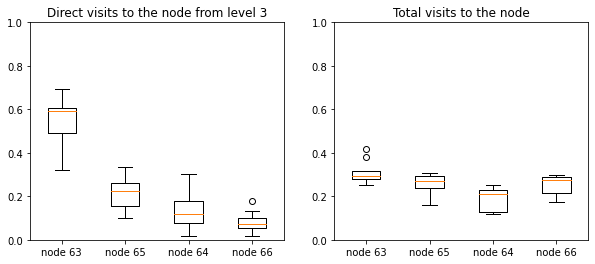

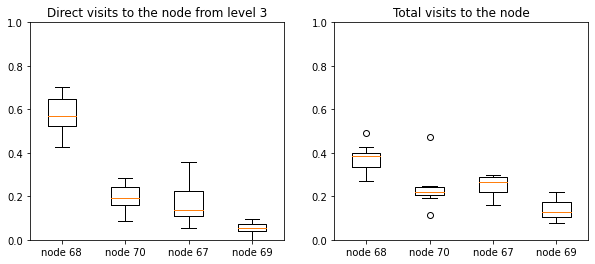

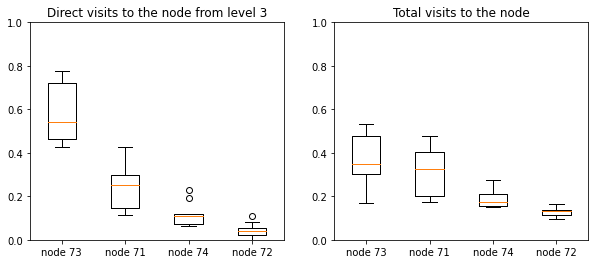

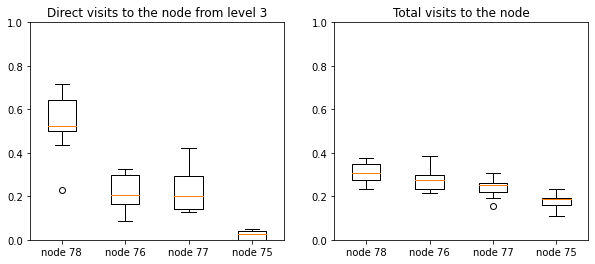

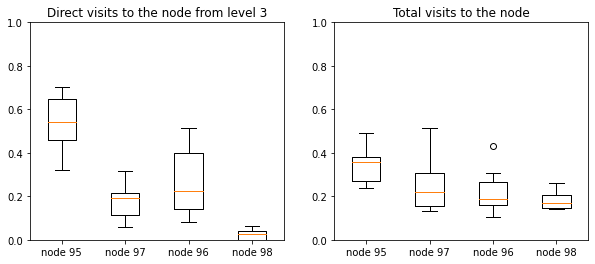

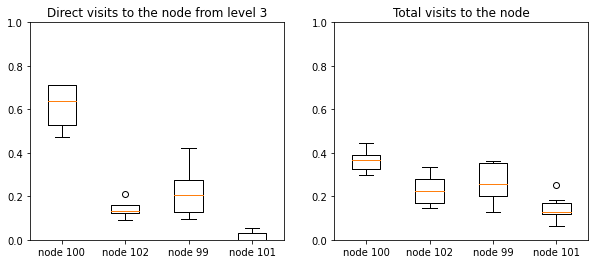

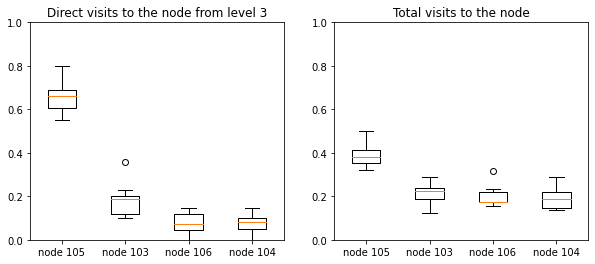

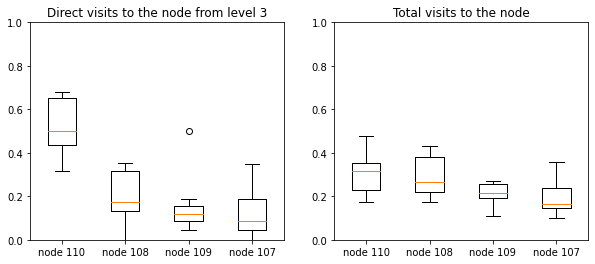

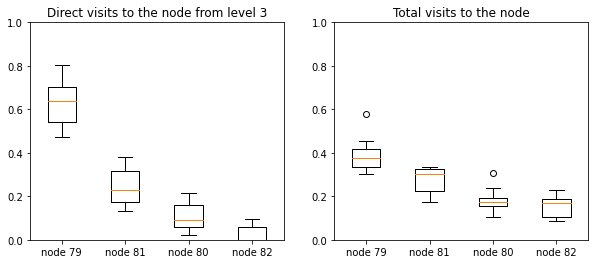

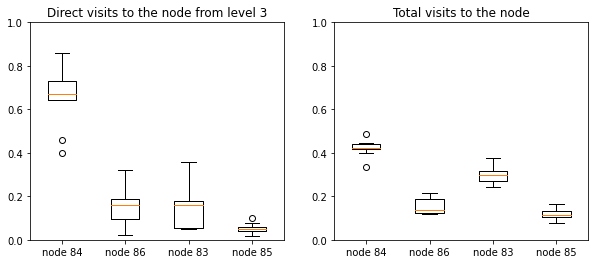

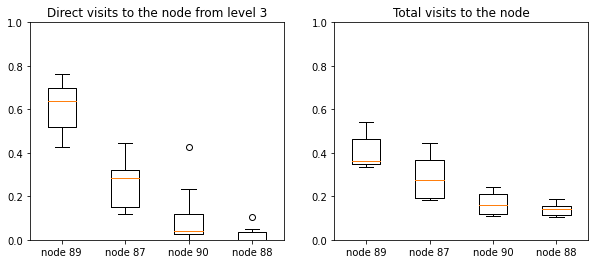

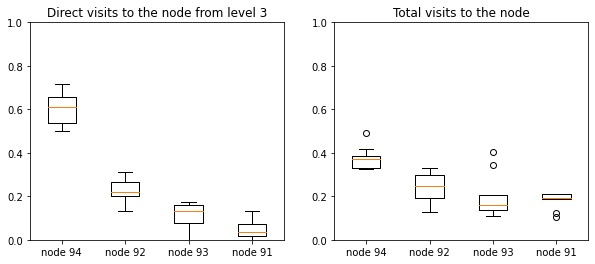

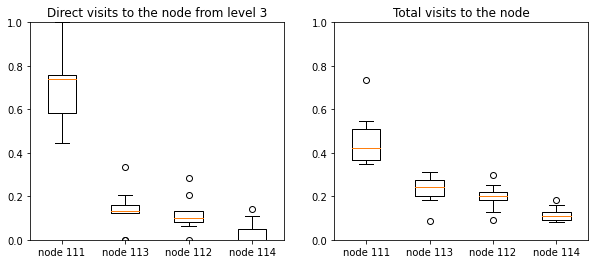

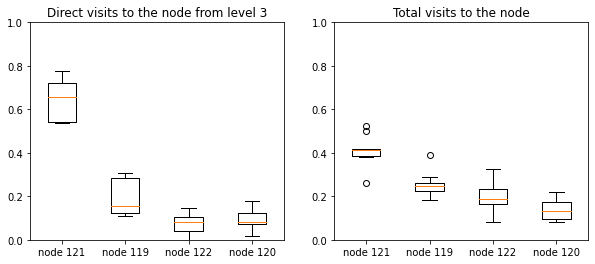

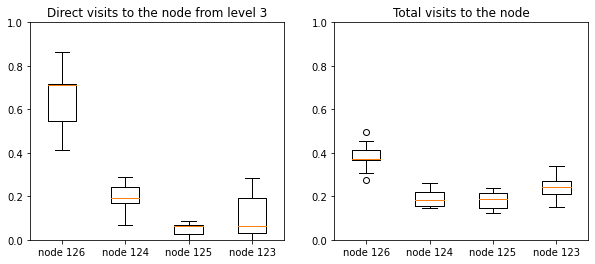

In [87]:
# node_pairs = [(68, 70), (67, 68), (79, 81), (79, 80), (83, 84), (84, 86), (109, 110), (108, 110), (121, 122), (121, 119)]

node_pairs = [
    (63, 65, 64, 66),
    (68, 70, 67, 69),
    (73, 71, 74, 72),
    (78, 76, 77, 75),
    (95, 97, 96, 98),
    (100, 102, 99, 101),
    (105, 103, 106, 104),
    (110, 108, 109, 107),
    (79, 81, 80, 82),
    (84, 86, 83, 85),
    (89, 87, 90, 88),
    (94, 92, 93, 91),
    (111, 113, 112, 114),
#     (116, 118, 115, 117),
    (121, 119, 122, 120),
    (126, 124, 125, 123),
]

all_counts = []
animals = params.UnrewNamesSub
for n1, n2, n3, n4 in node_pairs:
#     print(n1, n2, "pair")
    assert abs(n1-n2) == 2
    path1, path2, path3, path4 = level3_path(n1), level3_path(n2), level3_path(n3), level3_path(n4)
#     print(path1, path2)
    counts = []
    for sub in animals:
        if sub in animals and n1 in [116, 118]:
            continue
        tf = LoadTrajFromPath(outdata_path + sub + '-tf')
        path_count = _count_query_paths(tf, {
            path1: 1,
            path2: 1,
            path3: 1,
            path4: 1,
        })
        all_path_count = path_count[n1] + path_count[n2] + path_count[n3] + path_count[n4] 
        total_count = {
            n1: _count_total_visits(tf, n1), 
            n2: _count_total_visits(tf, n2),
            n3: _count_total_visits(tf, n3),
            n4: _count_total_visits(tf, n4)
        }
        all_total_count = total_count[n1]+total_count[n2]+total_count[n3]+total_count[n4]
        counts.append([
            path_count[n1]/all_path_count, 
            path_count[n2]/all_path_count, 
            path_count[n3]/all_path_count, 
            path_count[n4]/all_path_count, 
            total_count[n1]/all_total_count, 
            total_count[n2]/all_total_count,
            total_count[n3]/all_total_count,
            total_count[n4]/all_total_count,
        ])
#         print(sub, counts[-1])
        all_counts.append(counts[-1])
    if sub in animals and n1 in [116, 118]:
        continue
    counts = np.array(counts)
    plt.figure(figsize=(10, 4))
    ax1 = plt.subplot(121)
    ax1.boxplot(counts[:, :4])
    ax1.set_ylim([0, 1])
    ax1.set_title('Direct visits to the node from level 3')
    ax1.set_xticklabels([f'node {n1}', f'node {n2}', f'node {n3}', f'node {n4}'])

    ax2 = plt.subplot(122)
    ax2.boxplot(counts[:, 4:])
    ax2.set_ylim([0, 1])
    ax2.set_title('Total visits to the node')
    ax2.set_xticklabels([f'node {n1}', f'node {n2}', f'node {n3}', f'node {n4}'])
    plt.show()


[[0.59322034 0.25423729 0.11864407 0.03389831 0.29391892 0.30405405
  0.12837838 0.27364865]
 [0.59016393 0.26229508 0.01639344 0.13114754 0.3106383  0.2893617
  0.11914894 0.28085106]
 [0.6        0.225      0.075      0.1        0.28363636 0.29454545
  0.13090909 0.29090909]
 [0.48148148 0.33333333 0.11111111 0.07407407 0.28057554 0.30935252
  0.12230216 0.28776978]
 [0.49056604 0.13207547 0.30188679 0.0754717  0.2654321  0.27160494
  0.22839506 0.2345679 ]
 [0.32       0.32       0.18       0.18       0.25431034 0.23706897
  0.2112069  0.29741379]
 [0.69230769 0.15384615 0.13846154 0.01538462 0.41635688 0.19702602
  0.21189591 0.17472119]
 [0.68421053 0.19298246 0.05263158 0.07017544 0.31612903 0.24193548
  0.2516129  0.19032258]
 [0.6056338  0.09859155 0.23943662 0.05633803 0.38219895 0.16230366
  0.2382199  0.21727749]
 [0.53846154 0.19230769 0.23076923 0.03846154 0.2919708  0.23357664
  0.29927007 0.17518248]
 [0.42857143 0.14285714 0.35714286 0.07142857 0.35643564 0.24752475
  0

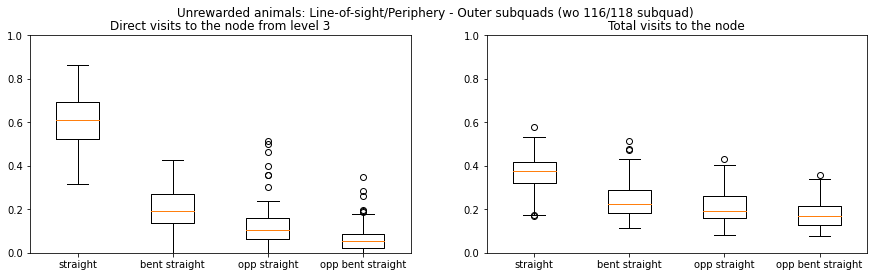

In [84]:
all_counts = np.array(all_counts)
print(all_counts)
print(all_counts.shape, "==================")
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
ax1.boxplot(all_counts[:, :4])
ax1.set_ylim([0, 1])
ax1.set_title('Direct visits to the node from level 3')
ax1.set_xticklabels(['straight', 'bent straight', 'opp straight', 'opp bent straight'])

ax2 = plt.subplot(122)
ax2.boxplot(all_counts[:, 4:])
ax2.set_ylim([0, 1])
ax2.set_title('Total visits to the node')
ax2.set_xticklabels(['straight', 'bent straight', 'opp straight', 'opp bent straight'])
plt.suptitle('Unrewarded animals: Line-of-sight/Periphery - Outer subquads (wo 116/118 subquad)')
plt.show()